# .:: Model of Strasberg ::.

In [1]:
from math import pi
import numpy as np
import matplotlib.pyplot as plt


# .: Attribute :. 
d = 1                                 # Distance from the center of the bubble.(m)
Fs = 10000                            # Sampling Frequency. (puntos/seg)
atm_pressure = 101325                 # Atmospheric pressure (Pa). Taking it as initial pressure (P0)
gamma = 1.40                          # Specific Heat Radio. (gamma = k = Cp/Cv)
    freq = 610                            # Frequency en Hz.
rho = 998                             # Liquid Water Density (rho). Expressed in (Kg/m^3)
tmax = 0.2                            # Maximun Time. (seg)
N = Fs * tmax                         # Number of points.
t = np.arange(0,N) / Fs               # Time
# radio = 0.0033                        # Initial radius of the bubble (R_0). Expressed in meters (m)
# h = 3                                 # Water Column Depth in (m)
# g = 9.98                              # Gravitational acceleration in (m/s^2)

#-------------------------------------------------
# .:: Calculating The Frequency (Minnaert) ::.
# Po = atm_pressure + rho * g * h
radio = ((3 * gamma * atm_pressure / rho) ** (1/2)) / (2 * pi * freq)


#-------------------------------------------------
# .:: Calculating the Sound Pressure Amplitude ::.
# Value obtained by clearing P+ in the equation 
# to calculate Sound pressure amplitude. (1,16 x 10^-4)

eP = 1.16 * (10**-4)

# p0 = (radio / d) * (2 * gamma * Po * eP) ** (1/2)
p0 = (radio / d) * (2 * gamma * atm_pressure * eP) ** (1/2)


#-------------------------------------------------
# .:: Calculating the Sound Pressure ::.
delta = 0.014 + 1.1 * 10**-5 * freq
e = np.exp(-pi * delta * freq * t)
cos = np.cos(2 * pi * freq * t)
ps = p0 * e * cos


#-------------------------------------------------
# Adding noise to the signal
noise = np.cos(2*pi*30*t)
Ps = ps * noise

### .:: Plotting the Sound Pressure ::.

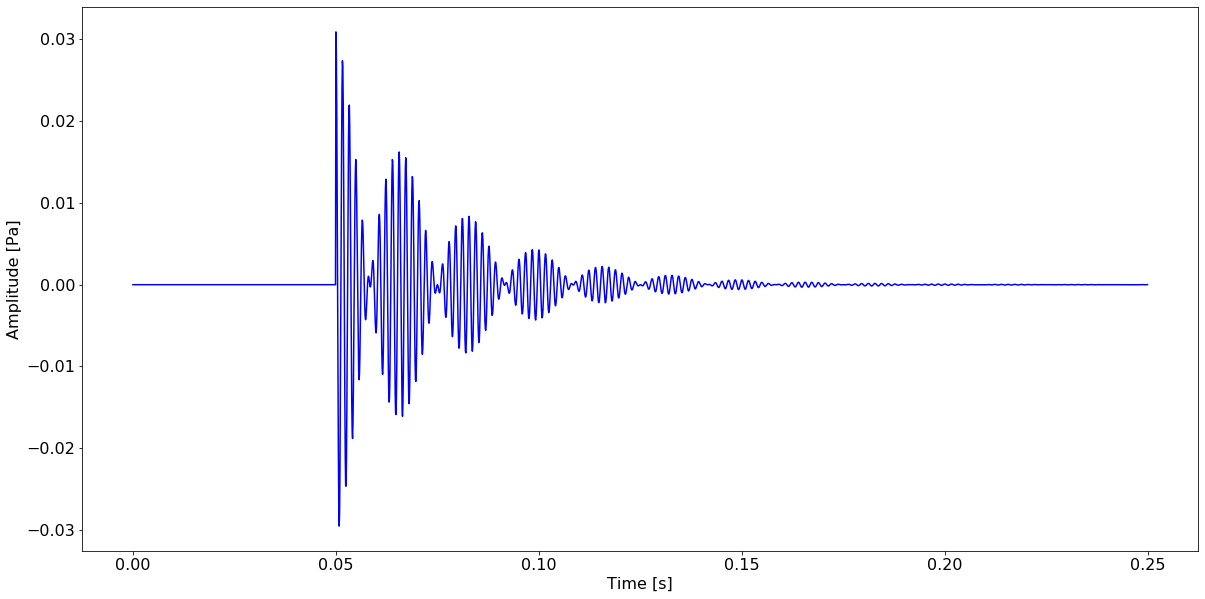

Image Description:
------------------
 » Radius: 5.4[mm] 
 » Frequency: 610[Hz]
 » Amplitude: 0.03[Pa]


In [2]:
start = np.zeros(500, dtype=float)
Ps1 = np.concatenate((start, Ps), axis=None)
length = len(start) + len(t)
t1 = np.arange(0, length) / 10000

# fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 4))
# ax1.set_title('Audio Signal')
# ax1.set_xlabel('Time [ms]')
# ax1.set_ylabel('Amplitude')
# ax1.plot(Ps1)

# ax2.specgram(Ps, Fs=Fs)
# ax2.set_title('Spectrogram')
# ax2.set_xlabel('Time [s]')
# ax2.set_ylabel('Frequency [Hz]')
# ax2.set_ylim(0, 3000)

plt.figure(figsize=(20, 10))
plt.rcParams.update({'font.size': 16})
# plt.title('Audio Signal')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude [Pa]')
plt.plot(t1, Ps1, 'blue')
# plt.xticks(np.arange(0, 220, 20))
# plt.xlim(0.10,0.30)
plt.show()

microbar = p0*10
print("Image Description:")
print("------------------")
print(" » Radius: %.1f[mm] \n » Frequency: %.0f[Hz]" %(radio * 1000, freq))
print(" » Amplitude: %.2f[Pa]" %(p0))